In [1]:
import csv
import pandas as pd
import os
import glob
#file_name = sorted(glob.glob("/content/*.csv"))[-1]

In [79]:
file_name = "/content/062405.csv"
encoding = 'SHIFT_JIS'
glass_t = 0.5

# CSVファイルをDataFrameとして読み込む
df = pd.read_csv(file_name, encoding=encoding, skiprows=15)
# 負の値を空白に置き換える
df = df - glass_t
df[df < 0] = 0.0
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[-1], axis=1)
df.to_csv(file_name+'(a).csv', index=False)

## データ変更

In [10]:
file_name = "/content/062405.csv"
encoding = 'SHIFT_JIS'
df = pd.read_csv(file_name, encoding=encoding, skiprows=15)
glass_t = 0.5

df = df - glass_t
m = df.median().median()
w = 0.003
#df[df < 0] = 0.0
df[(df >= m-w) & (df <= m+w)] = m
sf = ((df >= m-w) & (df <= m+w)).sum().sum()
af
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[-1], axis=1)
df.to_csv(file_name+'(z).csv', index=False)

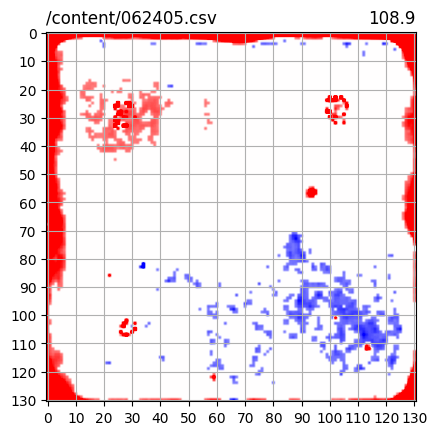

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np


norm = mcolors.Normalize(vmin=df['0'].median()-0.006, vmax=df['0'].median()+0.006)
#norm = mcolors.Normalize(vmin=df.min().min(), vmax=df.max().max())
cmap = plt.get_cmap('bwr')

fig, ax = plt.subplots()
im = ax.imshow(df, cmap=cmap, norm=norm)
ax.set_xticks(np.arange(0, 131, step=10))
ax.set_yticks(np.arange(0, 131, step=10))
ax.set_title( round(m*1000,1), loc='right')
ax.set_title( file_name, loc='left')
ax.grid()
#ax.set_xlim(-65,65)
#ax.set_ylim(-65, 65)
#fig.colorbar(im)
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
af = df[df].sum().summ()
print(af)

ValueError: Boolean array expected for the condition, not float64

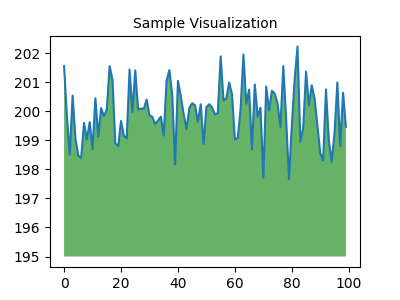

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)